### Importing necessary Libraries & Dataset

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv(r'C:\Users\SHREE\Downloads\Python CODES\Covid-19 Data Analysis\covid_19.csv')
data.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [4]:
data.count()

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

In [5]:
data.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

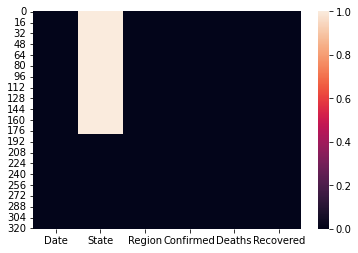

In [7]:
sns.heatmap(data.isnull())
plt.show()

### Exploratory Data Analysis

Show the number of Confirmed, Deaths & Recovered cases in each Region.

In [9]:
data.groupby('Region').sum().head(10)

,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7
Antigua and Barbuda,24,3,11
Argentina,4285,214,1192
Armenia,1932,30,900
Australia,6752,91,5715


In [13]:
data.groupby('Region')['Confirmed'].sum().sort_values(ascending = False).head(10)

Region
US                1039909
Spain              236899
Italy              203591
France             166543
UK                 166441
Germany            161539
Turkey             117589
Russia              99399
Iran                93657
Mainland China      82862
Name: Confirmed, dtype: int64

In [14]:
data.groupby('Region')['Confirmed', 'Recovered'].sum().head(10)

C:\Users\SHREE\AppData\Local\Temp/ipykernel_4364/679795429.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Region')['Confirmed', 'Recovered'].sum().head(10)


,Confirmed,Recovered
Region,,
Afghanistan,1939,252
Albania,766,455
Algeria,3848,1702
Andorra,743,423
Angola,27,7
Antigua and Barbuda,24,11
Argentina,4285,1192
Armenia,1932,900
Australia,6752,5715


Remove all records where Confirmed cases is less than 10.

In [17]:
data = data[~(data.Confirmed < 10)] # To remove records satisfying particular condition
data.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In which region, maximum number of confirmed cases were recorded?

In [19]:
data.groupby('Region').Confirmed.sum().sort_values(ascending = False).head(1)

Region
US    1039909
Name: Confirmed, dtype: int64

In which region minimum number of death cases were recorded?

In [25]:
data.groupby('Region').Deaths.sum().sort_values(ascending = True).head(23)

Region
Cambodia                            0
Seychelles                          0
Saint Lucia                         0
Central African Republic            0
Saint Kitts and Nevis               0
South Sudan                         0
Rwanda                              0
Grenada                             0
Macau                               0
Madagascar                          0
Nepal                               0
Namibia                             0
Saint Vincent and the Grenadines    0
Mozambique                          0
Holy See                            0
Timor-Leste                         0
Mongolia                            0
Uganda                              0
Laos                                0
Eritrea                             0
Vietnam                             0
Fiji                                0
Dominica                            0
Name: Deaths, dtype: int64

How many confirmed, deaths & recovered cases were reported from India till 29 April 2020?

In [27]:
data[data.Region == 'India']

,Date,State,Region,Confirmed,Deaths,Recovered
74,4/29/2020,NaN,India,33062,1079,8437


Sort entire data with respect to no. of confirmed cases in ascendig order.

In [28]:
data.sort_values(by = ['Confirmed'], ascending = True)

,Date,State,Region,Confirmed,Deaths,Recovered
156,4/29/2020,NaN,Suriname,10,1,8
70,4/29/2020,NaN,Holy See,10,0,2
59,4/29/2020,NaN,Gambia,10,1,8
318,4/29/2020,Yukon,Canada,11,0,0
217,4/29/2020,Greenland,Denmark,11,0,11
...,...,...,...,...,...,...
57,4/29/2020,NaN,France,165093,24087,48228
168,4/29/2020,NaN,UK,165221,26097,0
80,4/29/2020,NaN,Italy,203591,27682,71252
153,4/29/2020,NaN,Spain,236899,24275,132929


Sort entire data with respect to no. of recovered cases in descendig order.

In [30]:
data.sort_values(by = ['Recovered'], ascending = False)

,Date,State,Region,Confirmed,Deaths,Recovered
153,4/29/2020,NaN,Spain,236899,24275,132929
61,4/29/2020,NaN,Germany,161539,6467,120400
76,4/29/2020,NaN,Iran,93657,5957,73791
80,4/29/2020,NaN,Italy,203591,27682,71252
229,4/29/2020,Hubei,Mainland China,68128,4512,63616
...,...,...,...,...,...,...
258,4/29/2020,Nevada,US,4934,230,0
257,4/29/2020,Nebraska,US,3851,56,0
255,4/29/2020,Montana,US,451,16,0
254,4/29/2020,Missouri,US,7660,338,0
